In [63]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from charset_normalizer import detect
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from numpy import savez_compressed
from numpy import load
import os
from keras_facenet import FaceNet
from mtcnn import MTCNN

# Automate the preprocessing


In [64]:
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160,160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()


    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face_arr = cv.resize(face, self.target_size)
        return face_arr


    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = os.path.join(dir,im_name)
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                print("error for face extraction for file "+im_name)
                print(e)
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = os.path.join(self.directory,sub_dir)
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)} for {sub_dir}")
            self.X.extend(FACES)
            self.Y.extend(labels)

        return np.asarray(self.X), np.asarray(self.Y)


    def plot_images(self):
        plt.figure(figsize=(12,16))
        for num,image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')

Loaded successfully: 5 for anna
Loaded successfully: 7 for aswin
Loaded successfully: 5 for tiffany
Loaded successfully: 5 for tom cruise
Loaded successfully: 5 for vijay sethupathi


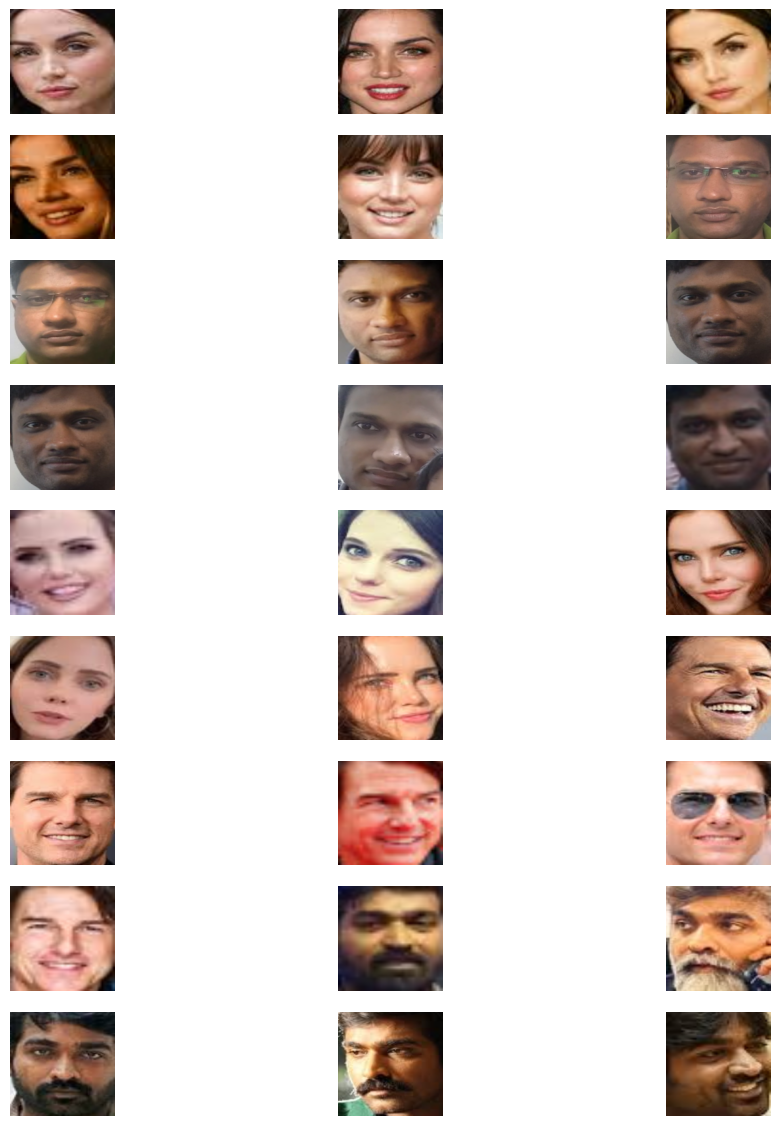

In [65]:
training_path = os.path.join(os.getcwd(),'training')
faceloading = FACELOADING(training_path)
X, Y = faceloading.load_classes()
faceloading.plot_images()

# FaceNet part

In [66]:
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0)
    # 4D (Nonex160x160x3)
    yhat= embedder.embeddings(face_img)
    return yhat[0] # 512D image (1x1x512)

In [67]:
EMBEDDED_X = []
for img in X:
    EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)
np.savez_compressed(os.path.join(os.getcwd(),'embeddings','face_embeddings.npz'), EMBEDDED_X, Y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━

# Encode person names into numerical data


In [68]:
print(Y)
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
print(Y)

['anna' 'anna' 'anna' 'anna' 'anna' 'aswin' 'aswin' 'aswin' 'aswin'
 'aswin' 'aswin' 'aswin' 'tiffany' 'tiffany' 'tiffany' 'tiffany' 'tiffany'
 'tom cruise' 'tom cruise' 'tom cruise' 'tom cruise' 'tom cruise'
 'vijay sethupathi' 'vijay sethupathi' 'vijay sethupathi'
 'vijay sethupathi' 'vijay sethupathi']
[0 0 0 0 0 1 1 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4]


Text(0, 0.5, '0')

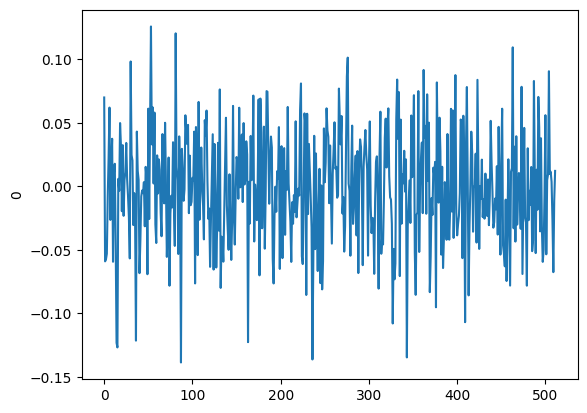

In [69]:
plt.plot(EMBEDDED_X[0])
plt.ylabel(Y[0])

# SVM Model Training

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=17)
# Train SVM classifier
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [71]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)
print(f'accuracy score train subset of images: {accuracy_score(Y_train, ypreds_train)}')
print(f'accuracy score test subset of images: {accuracy_score(Y_test,ypreds_test)}')

accuracy score train subset of images: 1.0
accuracy score test subset of images: 1.0


In [72]:
#save trained model to local disk
import pickle
#save the model
with open(os.path.join(os.getcwd(),'model','svm_model.pkl'),'wb') as f:
    pickle.dump(model,f)

# Validate model by predicting test image

In [73]:
#load model
model_path = os.path.join(os.getcwd(),'model','svm_model.pkl')
model = pickle.load(open(model_path, 'rb'))

119 16 60 77


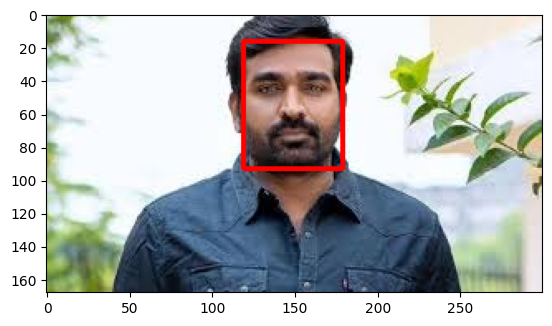

In [74]:
#detect face from image using MTCNN(Multi Task Cascaded Convolutional network)
detector = MTCNN()
test_im = cv.imread(os.path.join(os.getcwd(),'test images','t0.jpeg'))
test_im = cv.cvtColor(test_im, cv.COLOR_BGR2RGB)
x,y,w,h = detector.detect_faces(test_im)[0]['box']
print(x,y,w,h)
cv.rectangle(test_im,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(test_im)

In [75]:
#feature extraction
face_im = test_im[y:y+h, x:x+w]
face_im = cv.resize(face_im, (160,160))
face_embedding = get_embedding(face_im)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [76]:
#face recognition
face_embedding = [face_embedding]
ypreds = model.predict(face_embedding)

Person:anna confidence:13.55%
Person:aswin confidence:5.83%
Person:tiffany confidence:11.75%
Person:tom cruise confidence:8.68%
Person:vijay sethupathi confidence:60.19%
Detected person: vijay sethupathi


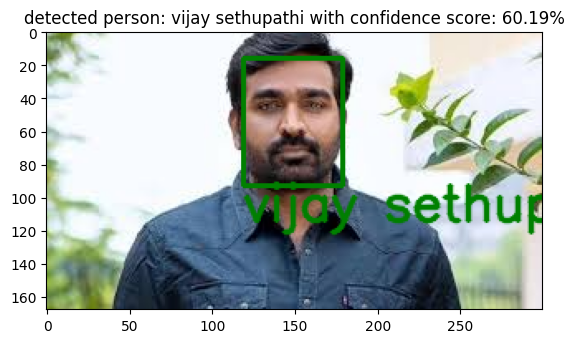

In [77]:
#show the prediction results
confidence_threshold = 0.55
name = 'unknown'
confidence_percentage =0.0
font = cv.FONT_HERSHEY_SIMPLEX
font_scale = 0.7
font_thickness = 2
text_color = (255, 0, 0)  # red

conf_score=model.predict_proba(face_embedding)[0]
for i,value in np.ndenumerate(conf_score):
    ypreds[0] = i[0]
    label = encoder.inverse_transform(ypreds)[0]
    print(f"Person:{label} confidence:{round(value*100,2)}%")
    if value > confidence_threshold:
        name=label
        text_color = (0,128,0) #green
        confidence_percentage = round(value*100,2)
print('Detected person:',name)
cv.rectangle(test_im,(x,y),(x+w,y+h), text_color,2)
# Get the size of the text to ensure it fits and for proper vertical offset
(text_width, text_height), baseline = cv.getTextSize(str(name), font, font_scale, font_thickness)
text_x = x
text_y = y + h + text_height + 5  # 5 pixels margin below the box
cv.putText(test_im, str(name), (text_x, text_y), cv.FONT_HERSHEY_SIMPLEX,1, text_color, 2, cv.LINE_AA)
if name != 'unknown':
    plt.title(f"detected person: {name} with confidence score: {confidence_percentage}%")
else:
    plt.title("unknown person")
plt.imshow(test_im)